In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
warnings.filterwarnings('ignore')

In [2]:
sys.path

['C:\\Users\\camer\\OneDrive\\Documents\\dev\\home_research\\research_projects',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\python310.zip',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\DLLs',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research',
 '',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib\\site-packages',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib\\site-packages\\win32',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\camer\\anaconda3\\envs\\home_research\\lib\\site-packages\\setuptools\\_vendor',
 '..']

## Read Train data

In [3]:
path = 'C:/Users/camer/OneDrive/Documents/dev/home_research/data/football_prediction/'

train_home_team_statistics_df = pd.read_csv(path + 'train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv(path + 'train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv(path + 'Y_train.csv', index_col=0)

train_home = train_home_team_statistics_df.iloc[:,2:]
train_away = train_away_team_statistics_df.iloc[:,2:]

train_home.columns = 'HOME_' + train_home.columns
train_away.columns = 'AWAY_' + train_away.columns

train_data =  pd.concat([train_home,train_away],join='inner',axis=1)
train_scores = train_scores.loc[train_data.index]

train_data = train_data.replace({np.inf:np.nan,-np.inf:np.nan})


In [4]:
train_home_team_statistics_df.head()

,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0


In [5]:
train_home_team_statistics_df.columns

Index(['LEAGUE', 'TEAM_NAME', 'TEAM_SHOTS_TOTAL_season_sum',
       'TEAM_SHOTS_INSIDEBOX_season_sum', 'TEAM_SHOTS_OFF_TARGET_season_sum',
       'TEAM_SHOTS_ON_TARGET_season_sum', 'TEAM_SHOTS_OUTSIDEBOX_season_sum',
       'TEAM_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_sum',
       'TEAM_SAVES_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=142)

In [6]:
train_scores.sum()

HOME_WINS    5356
DRAW         3186
AWAY_WINS    3761
dtype: int64

In [7]:
train_home_player_statistics_df = pd.read_csv(path + 'train_home_player_statistics_df.csv', index_col=0)
train_away_player_statistics_df = pd.read_csv(path + 'train_away_player_statistics_df.csv', index_col=0)

In [8]:
train_home_player_statistics_df.head()

,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,...,PLAYER_STARTING_LINEUP_5_last_match_std,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_std,PLAYER_TACKLES_5_last_match_std,PLAYER_TOTAL_CROSSES_5_last_match_std,PLAYER_TOTAL_DUELS_5_last_match_std,PLAYER_YELLOWCARDS_5_last_match_std,PLAYER_PUNCHES_5_last_match_std,PLAYER_LONG_BALLS_5_last_match_std,PLAYER_LONG_BALLS_WON_5_last_match_std,PLAYER_SHOTS_OFF_TARGET_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,defender,Agustín Rogel,0.0,8.0,5.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,defender,Mathieu Goncalves,0.0,7.0,4.0,0.0,0.0,0.0,...,63.0,14.0,13.0,0.0,36.0,77.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,goalkeeper,Baptiste Reynet,0.0,33.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,midfielder,Jean-Victor Makengo,8.0,27.0,2.0,0.0,8.0,0.0,...,63.0,0.0,13.0,6.0,17.0,0.0,NaN,NaN,NaN,NaN
0,Ligue 1,Toulouse,NaN,Efthymios Koulouris,2.0,23.0,27.0,14.0,8.0,37.0,...,63.0,17.0,10.0,13.0,27.0,0.0,NaN,NaN,NaN,NaN


In [9]:
# lets try aggregating some stats per game
train_home_player_statistics_df_by_id_position = train_home_player_statistics_df.drop(['LEAGUE', 'TEAM_NAME', 'PLAYER_NAME'], axis=1).groupby(['ID', 'POSITION']).median()

In [10]:
train_home_player_statistics_df_by_id_position.head(20)

PLAYER_ACCURATE_CROSSES_season_sum  \
ID POSITION                                         
0  defender                                   1.0   
   goalkeeper                                 0.0   
   midfielder                                 6.5   
1  defender                                   0.0   
   goalkeeper                                 0.0   
   midfielder                                 3.0   
2  attacker                                   1.0   
   defender                                   4.0   
   goalkeeper                                 0.0   
   midfielder                                 5.0   
3  attacker                                   1.0   
   defender                                   0.0   
   goalkeeper                                 0.0   
   midfielder                                20.0   
4  attacker                                  11.5   
   defender                                   0.0   
   goalkeeper                                 0.0   
   midfielder                                 5.0   
5  defender                                   2.0   
   goalkeeper                                 0.0   

               PLAYER_ACCURATE_PASSES_season_sum  \
ID POSITION                                        
0  defender                                 28.0   
   goalkeeper                               16.5   
   midfielder                               25.5   
1  defender                                 65.0   
   goalkeeper                               14.0   
   midfielder                               29.5   
2  attacker                                  3.0   
   defender                                 15.0   
   goalkeeper                               11.5   
   midfielder                               16.0   
3  attacker                                 11.0   
   defender                                 65.5   
   goalkeeper                               20.5   
   midfielder                               42.0   
4  attacker                                 22.5   
   defender                                 16.0   
   goalkeeper                                8.5   
   midfielder                               38.0   
5  defender                                 28.0   
   goalkeeper                                7.5   

               PLAYER_AERIALS_WON_season_sum  PLAYER_ASSISTS_season_sum  \
ID POSITION                                                               
0  defender                             13.0                        0.0   
   goalkeeper                            1.0                        0.0   
   midfielder                            5.0                        7.0   
1  defender                             34.0                        0.0   
   goalkeeper                            3.0                        0.0   
   midfielder                            4.0                       20.0   
2  attacker                              1.5                        0.0   
   defender                             12.0                        0.0   
   goalkeeper                            2.0                        0.0   
   midfielder                           11.5                        3.5   
3  attacker                             12.5                       13.5   
   defender                             47.5                        4.5   
   goalkeeper                            2.0                        0.0   
   midfielder                            9.5                       18.0   
4  attacker                             14.5                       24.5   
   defender                             12.0                        0.0   
   goalkeeper                            1.5                        0.0   
   midfielder                            9.0                        0.0   
5  defender                             15.0                        0.0   
   goalkeeper                            0.5                        0.0   

               PLAYER_BIG_CHANCES_CREATED_season_sum

## Feature Selection

In [12]:
from helper_functions.general.feature_selection import generate_heatmap, linear_model_with_pvalue_threshold, linear_model_with_anova_f_test, feature_importance_mdi_pmf_with_rf, create_pipeline_with_scaler_and_pca, get_pca_components 

In [17]:
train_data

,HOME_TEAM_SHOTS_TOTAL_season_sum,HOME_TEAM_SHOTS_INSIDEBOX_season_sum,HOME_TEAM_SHOTS_OFF_TARGET_season_sum,HOME_TEAM_SHOTS_ON_TARGET_season_sum,HOME_TEAM_SHOTS_OUTSIDEBOX_season_sum,HOME_TEAM_PASSES_season_sum,HOME_TEAM_SUCCESSFUL_PASSES_season_sum,HOME_TEAM_SAVES_season_sum,HOME_TEAM_CORNERS_season_sum,HOME_TEAM_FOULS_season_sum,...,AWAY_TEAM_YELLOWCARDS_5_last_match_std,AWAY_TEAM_REDCARDS_5_last_match_std,AWAY_TEAM_OFFSIDES_5_last_match_std,AWAY_TEAM_ATTACKS_5_last_match_std,AWAY_TEAM_PENALTIES_5_last_match_std,AWAY_TEAM_SUBSTITUTIONS_5_last_match_std,AWAY_TEAM_BALL_SAFE_5_last_match_std,AWAY_TEAM_DANGEROUS_ATTACKS_5_last_match_std,AWAY_TEAM_INJURIES_5_last_match_std,AWAY_TEAM_GOALS_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,
0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,5.0,3.0,6.0,...,5.0,5.0,4.0,0.0,6.0,8.0,4.0,3.0,2.0,3.0
1,6.0,8.0,3.0,6.0,5.0,8.0,7.0,10.0,6.0,8.0,...,0.0,0.0,3.0,1.0,8.0,4.0,10.0,0.0,5.0,3.0
2,4.0,2.0,5.0,2.0,8.0,1.0,1.0,2.0,2.0,7.0,...,6.0,10.0,4.0,4.0,0.0,8.0,3.0,0.0,9.0,6.0
3,7.0,5.0,5.0,6.0,6.0,9.0,9.0,2.0,2.0,0.0,...,0.0,0.0,1.0,2.0,0.0,5.0,6.0,3.0,NaN,2.0
4,3.0,3.0,2.0,3.0,4.0,4.0,3.0,4.0,4.0,7.0,...,1.0,0.0,4.0,4.0,9.0,4.0,1.0,4.0,6.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12298,4.0,2.0,3.0,4.0,7.0,4.0,4.0,3.0,2.0,2.0,...,5.0,5.0,0.0,1.0,6.0,10.0,1.0,1.0,NaN,2.0
12299,4.0,2.0,3.0,1.0,5.0,1.0,1.0,9.0,1.0,10.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,4.0,3.0,5.0,3.0,5.0,1.0,1.0,6.0,1.0,8.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0


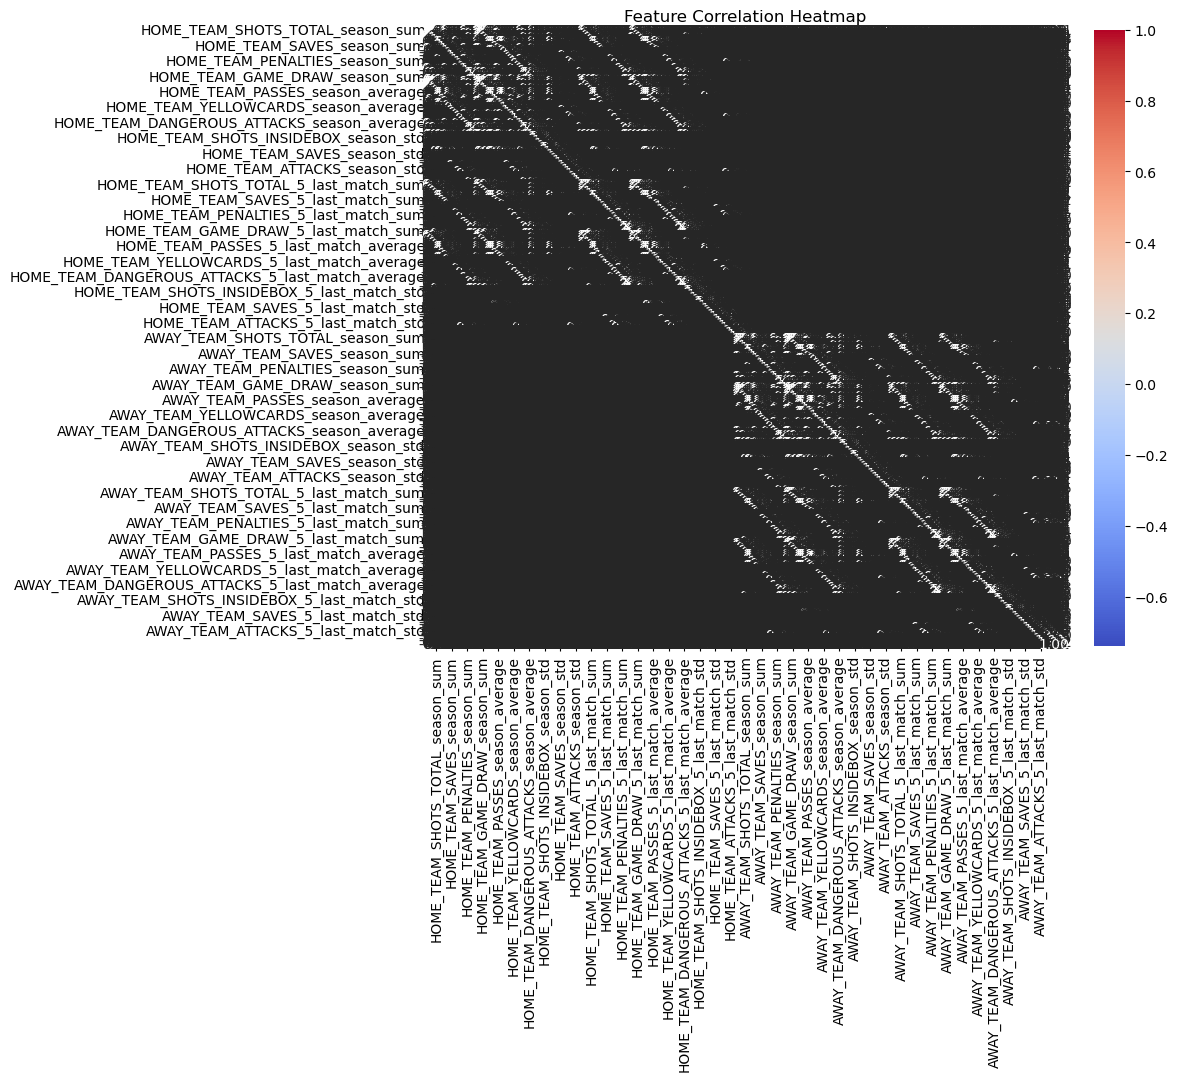

## Benchmark

We try to model if AWAY wins

In [9]:
train_new_y = train_scores['AWAY_WINS']

### train, valid test split

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(train_data, train_new_y, train_size=0.8, random_state=42)
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X_train, y_train, train_size=0.8, random_state=42)


### xgb model

In [11]:
params_1 = {
    'booster': 'gbtree',
    'tree_method':'hist',
    'max_depth': 8, 
    'learning_rate': 0.025,
    'objective': 'multi:softprob',
    'num_class': 2,
    'eval_metric':'mlogloss'
    }


d_train = xgb.DMatrix(X_train.replace({0:np.nan}), y_train)
d_valid = xgb.DMatrix(X_valid.replace({0:np.nan}), y_valid)

num_round = 10000
evallist = [(d_train, 'train'), (d_valid, 'eval')]

bst = xgb.train(params_1, d_train, num_round, evallist, early_stopping_rounds=100)


[0]	train-mlogloss:0.68338	eval-mlogloss:0.68785
[1]	train-mlogloss:0.67389	eval-mlogloss:0.68266
[2]	train-mlogloss:0.66467	eval-mlogloss:0.67757
[3]	train-mlogloss:0.65574	eval-mlogloss:0.67304
[4]	train-mlogloss:0.64724	eval-mlogloss:0.66849
[5]	train-mlogloss:0.63894	eval-mlogloss:0.66438
[6]	train-mlogloss:0.63052	eval-mlogloss:0.66062
[7]	train-mlogloss:0.62230	eval-mlogloss:0.65697
[8]	train-mlogloss:0.61454	eval-mlogloss:0.65359
[9]	train-mlogloss:0.60701	eval-mlogloss:0.65015
[10]	train-mlogloss:0.59949	eval-mlogloss:0.64682
[11]	train-mlogloss:0.59224	eval-mlogloss:0.64347
[12]	train-mlogloss:0.58520	eval-mlogloss:0.64026
[13]	train-mlogloss:0.57876	eval-mlogloss:0.63741
[14]	train-mlogloss:0.57188	eval-mlogloss:0.63467
[15]	train-mlogloss:0.56536	eval-mlogloss:0.63191
[16]	train-mlogloss:0.55888	eval-mlogloss:0.62946
[17]	train-mlogloss:0.55254	eval-mlogloss:0.62681
[18]	train-mlogloss:0.54669	eval-mlogloss:0.62444
[19]	train-mlogloss:0.54078	eval-mlogloss:0.62231
[20]	train

[163]	train-mlogloss:0.19590	eval-mlogloss:0.56893
[164]	train-mlogloss:0.19480	eval-mlogloss:0.56891
[165]	train-mlogloss:0.19338	eval-mlogloss:0.56882
[166]	train-mlogloss:0.19254	eval-mlogloss:0.56889
[167]	train-mlogloss:0.19129	eval-mlogloss:0.56854
[168]	train-mlogloss:0.19041	eval-mlogloss:0.56851
[169]	train-mlogloss:0.18934	eval-mlogloss:0.56867
[170]	train-mlogloss:0.18827	eval-mlogloss:0.56846
[171]	train-mlogloss:0.18683	eval-mlogloss:0.56837
[172]	train-mlogloss:0.18580	eval-mlogloss:0.56860
[173]	train-mlogloss:0.18485	eval-mlogloss:0.56868
[174]	train-mlogloss:0.18373	eval-mlogloss:0.56875
[175]	train-mlogloss:0.18290	eval-mlogloss:0.56876
[176]	train-mlogloss:0.18175	eval-mlogloss:0.56878
[177]	train-mlogloss:0.18071	eval-mlogloss:0.56891
[178]	train-mlogloss:0.17942	eval-mlogloss:0.56898
[179]	train-mlogloss:0.17835	eval-mlogloss:0.56892
[180]	train-mlogloss:0.17758	eval-mlogloss:0.56900
[181]	train-mlogloss:0.17679	eval-mlogloss:0.56899
[182]	train-mlogloss:0.17585	ev

### Some analysis

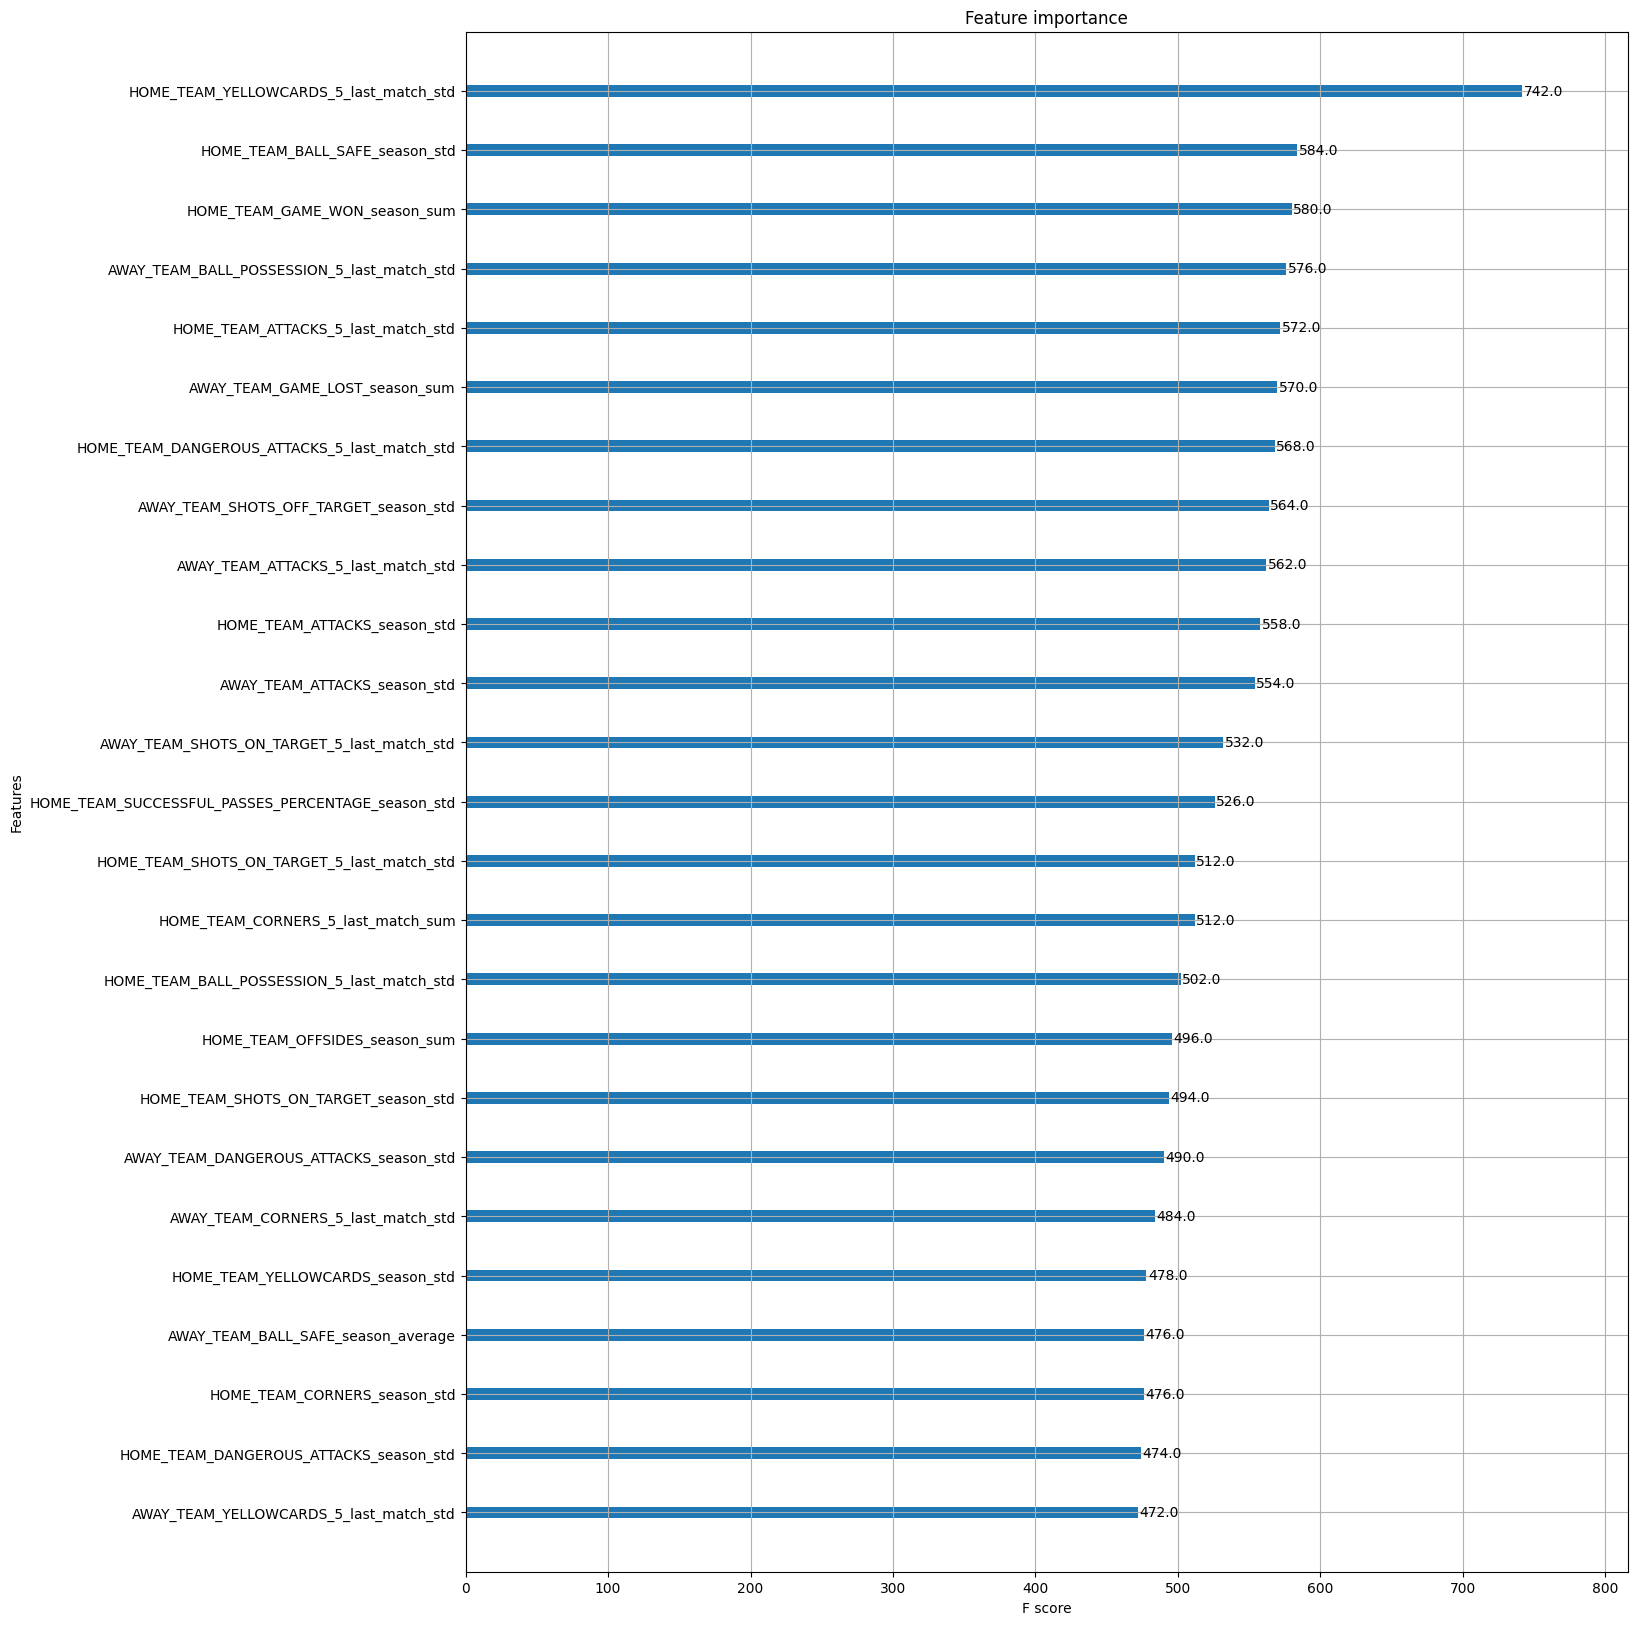

In [12]:
xgb.plot_importance(bst, max_num_features=25)
fig = plt.gcf()
fig.set_size_inches(15, 20)


### Accuracy on test set

A simple benchmark is always predicting home wins

In [13]:
target = train_scores.loc[X_test.index].copy()

home_wins = target
home_wins = 0 * home_wins
home_wins.iloc[:,0] = 1

np.round(accuracy_score(home_wins,target),4)


0.4401

Using our model

In [18]:
X_test_xgb = xgb.DMatrix(X_test)

predictions = bst.predict(X_test_xgb, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1] # predict no draws, binary classifier just says if home or away team will win
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int).values
np.round(accuracy_score(predictions,target),4)

0.4742

## Submission

In [20]:

test_home = pd.read_csv(path + 'test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv(path + 'test_away_team_statistics_df.csv', index_col=0)

test_home.columns = 'HOME_' + test_home.columns
test_away.columns = 'AWAY_' + test_away.columns

test_data =  pd.concat([test_home,test_away],join='inner',axis=1)


In [22]:
X_bench = xgb.DMatrix(test_data)

predictions = bst.predict(X_bench, iteration_range=(0, bst.best_iteration))
predictions = pd.DataFrame(predictions)

predictions[2] = 0
predictions.columns = [0,2,1]
predictions = (predictions.reindex(columns=[0,1,2]).rank(1,ascending=False)==1).astype(int)

predictions.columns = ['HOME_WINS', 'DRAW', 'AWAY_WINS']
predictions.index = test_data.index
submission = predictions.reset_index()
submission.to_csv(path + 'benchmark_submission.csv', index=False)
